# Assignment 2 - BUSA8001 Applied Predictive Analytics
* Student name: Hea Rang Heo
* Student number: 48133981

---
## Exploratory Data Analysis

In [300]:
# Import all necessary packages and read CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/hearangheo/Documents/Applied-Predictive-Analytics/data.csv')

In [301]:
# Overview of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           2000 non-null   int64
 1   Marital Status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement Size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [302]:
# Summary statistics of data set
df.describe()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.60450,0.500500,40.823500,1.456500,137516.196500,0.612500,0.834000
std,0.48908,0.500125,9.455848,0.783846,46184.296588,0.674219,0.967942
min,0.00000,0.000000,20.000000,0.000000,35832.000000,0.000000,0.000000
25%,0.00000,0.000000,33.000000,1.000000,101262.750000,0.000000,0.000000
50%,1.00000,1.000000,40.000000,1.000000,133004.000000,1.000000,0.000000
75%,1.00000,1.000000,48.000000,2.000000,171232.500000,1.000000,2.000000
max,1.00000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000


In [303]:
# Create copy of df to df_EDA to be used for EDA
df_EDA = df.copy()

In [304]:
numerical_cols = ['Age', 'Income']

# Summary statistics
summary_stats = df_EDA[numerical_cols].describe().loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Round for readability
print(summary_stats.round(3))

            Age      Income
count  2000.000    2000.000
mean     40.824  137516.196
std       9.456   46184.297
min      20.000   35832.000
25%      33.000  101262.750
50%      40.000  133004.000
75%      48.000  171232.500
max      76.000  309364.000


In [305]:
# Displays number of customers for each category in column "Gender"
gender_labels = {0: 'Male', 1: 'Female'}
df_EDA['Gender'].map(gender_labels).value_counts()

Gender
Female    1209
Male       791
Name: count, dtype: int64

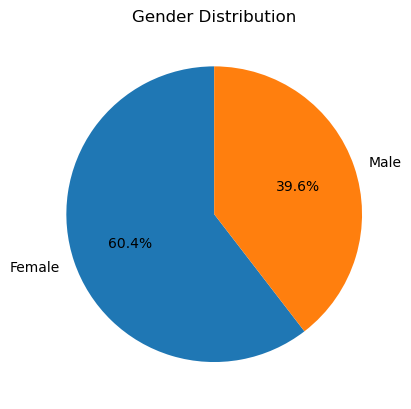

In [330]:
# Map gender values to labels
gender_labels = {
    0: 'Male', 
    1: 'Female'
    }

gender_counts = df_EDA['Gender'].map(gender_labels).value_counts()

# Plot to pie graph
gender_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    title='Gender Distribution',
    ylabel=''
)
plt.show()

In [307]:
# Displays number of customers for each category in column "Marital Status"
gender_labels = {0: 'Single', 1: 'Non-single'}
df_EDA['Marital Status'].map(gender_labels).value_counts()

Marital Status
Non-single    1001
Single         999
Name: count, dtype: int64

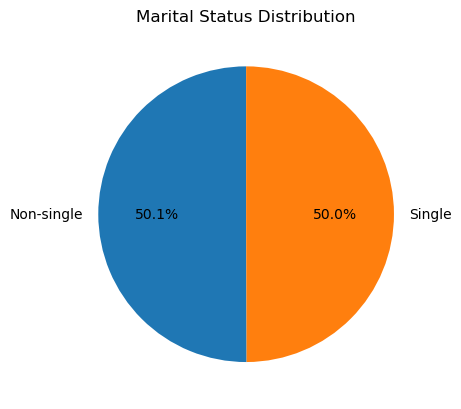

In [331]:
# Map marital status values to labels
marital_map = {
    0: "Single", 
    1: "Non-single"
    }

marital_counts = df_EDA['Marital Status'].map(marital_map).value_counts()

marital_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    title='Marital Status Distribution',
    ylabel=''
)

plt.show()

/Users/hearangheo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


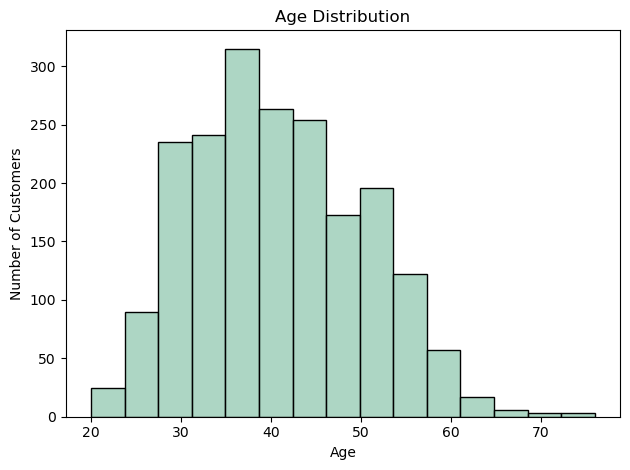

In [309]:
sns.histplot(df_EDA["Age"], bins=15, color='#92C9B1')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

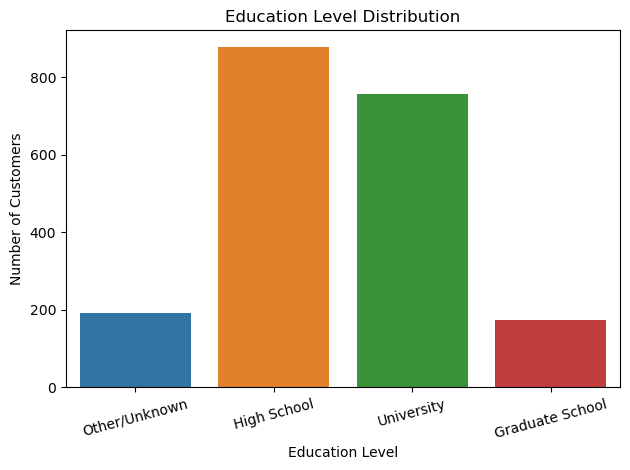

In [310]:
# Bar graph of "Education"
# Map numeric values to education levels
education_map = {
    0: "Other/Unknown",
    1: "High School",
    2: "University",
    3: "Graduate School"
}

# Ensure education labels appear in logical order
education_order = [
    "Other/Unknown",
    "High School",
    "University",
    "Graduate School"
]

# Apply mapping
df_EDA["Education"] = df_EDA["Education"].map(education_map)

# Count values
education_counts = df_EDA["Education"].value_counts().reindex(education_order)

# Plot bar chart
# plt.figure(figsize=(8, 5))
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [311]:
# Displays number of customers for each category in column "Education"
df_EDA["Education"].value_counts()

Education
High School        877
University         757
Other/Unknown      192
Graduate School    174
Name: count, dtype: int64

/Users/hearangheo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


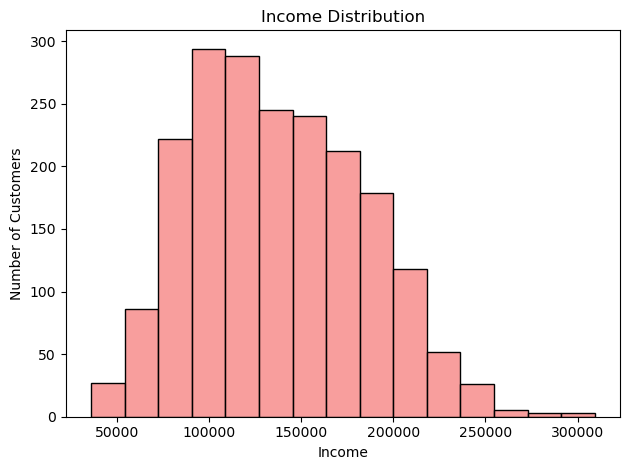

In [332]:
# Histogram of "Income" distribution
sns.histplot(df_EDA["Income"], bins=15, color='#F67E7D')
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

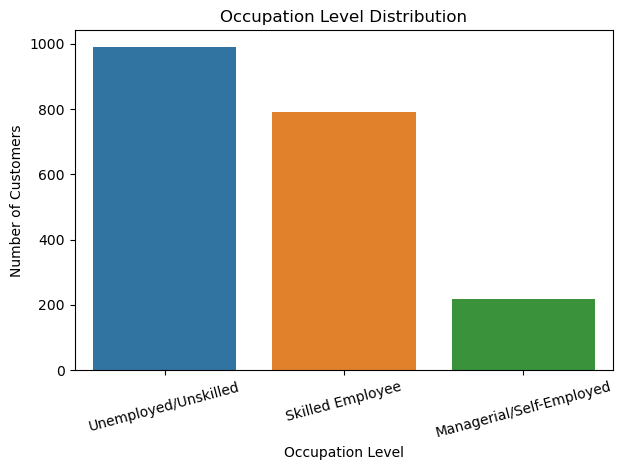

In [313]:
occupation_map = {
    0: "Unemployed/Unskilled",
    1: "Skilled Employee",
    2: "Managerial/Self-Employed"
}

occupation_order = [
    "Unemployed/Unskilled",
    "Skilled Employee",
    "Managerial/Self-Employed"
]

df_EDA["Occupation"] = df_EDA["Occupation"].map(occupation_map)

# Count values
occupation_counts = df_EDA["Occupation"].value_counts().reindex(occupation_order)

# Plot bar chart
sns.barplot(x=occupation_counts.index, y=occupation_counts.values)
plt.title("Occupation Level Distribution")
plt.xlabel("Occupation Level")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [314]:
# Displays number of customers for each category in column "Occupation"
df_EDA["Occupation"].value_counts()

Occupation
Unemployed/Unskilled        992
Skilled Employee            791
Managerial/Self-Employed    217
Name: count, dtype: int64

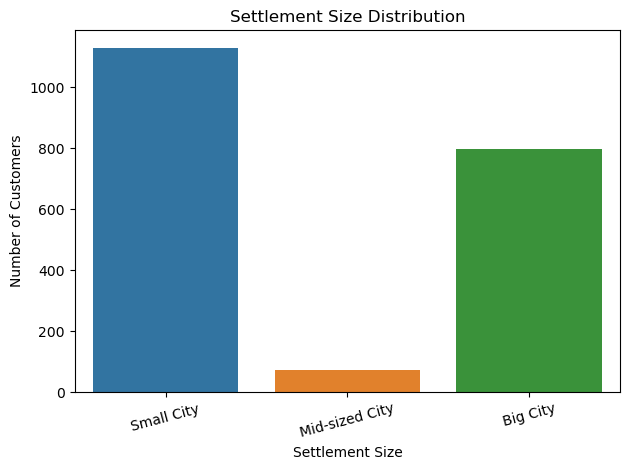

In [315]:
settlement_map = {
    0: "Small City",
    1: "Mid-sized City",
    2: "Big City"
}

settlement_order = [
    "Small City",
    "Mid-sized City",
    "Big City"
]

df_EDA["Settlement Size"] = df_EDA["Settlement Size"].map(settlement_map)

# Count values
settlement_counts = df_EDA["Settlement Size"].value_counts().reindex(settlement_order)

# Plot bar chart
sns.barplot(x=settlement_counts.index, y=settlement_counts.values)
plt.title("Settlement Size Distribution")
plt.xlabel("Settlement Size")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [316]:
# Displays number of customers for each category in column "Settlement Size"
df_EDA["Settlement Size"].value_counts()

Settlement Size
Small City        1130
Big City           798
Mid-sized City      72
Name: count, dtype: int64

## Customer Segmentation

In [318]:
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples

In [319]:
# Standardize Age and Income
scaler = StandardScaler()
df[['Age_scaled', 'Income_scaled']] = scaler.fit_transform(df[['Age', 'Income']])

# Replaced unstandardized variables Age and Income to a new df called df2, to be used for clustering
df2 = df.drop(columns=['Age', 'Income', 'Age_scaled', 'Income_scaled']).copy()
df2[['Age', 'Income']] = df[['Age_scaled', 'Income_scaled']]


In [320]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2000 non-null   int64  
 1   Marital Status   2000 non-null   int64  
 2   Education        2000 non-null   int64  
 3   Occupation       2000 non-null   int64  
 4   Settlement Size  2000 non-null   int64  
 5   Age              2000 non-null   float64
 6   Income           2000 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 109.5 KB


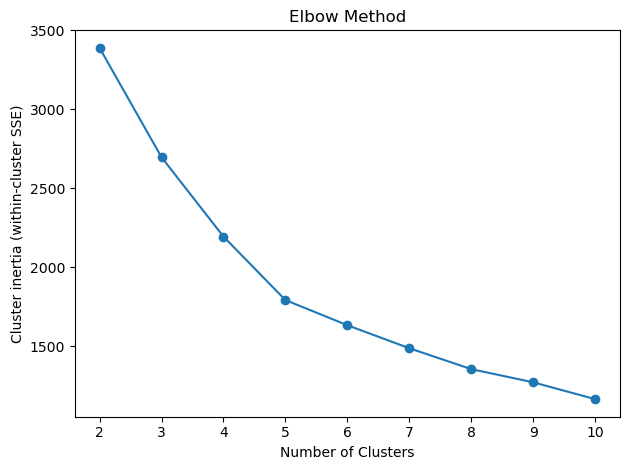

In [321]:
inertias = []
k_values = range(2,11)

for i in k_values:
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df2)
    inertias.append(km.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(k_values)
plt.tight_layout()
plt.show()

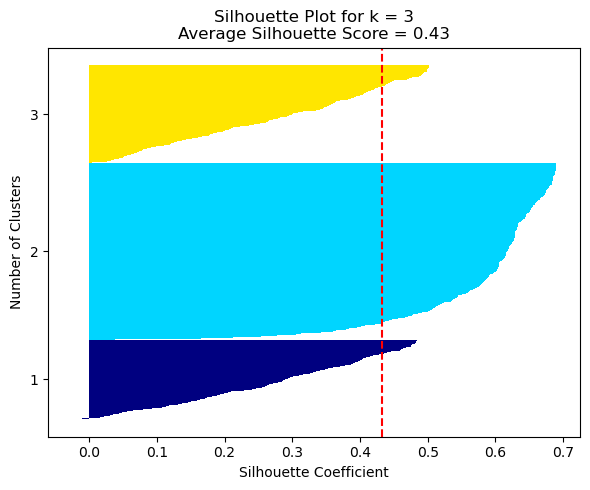

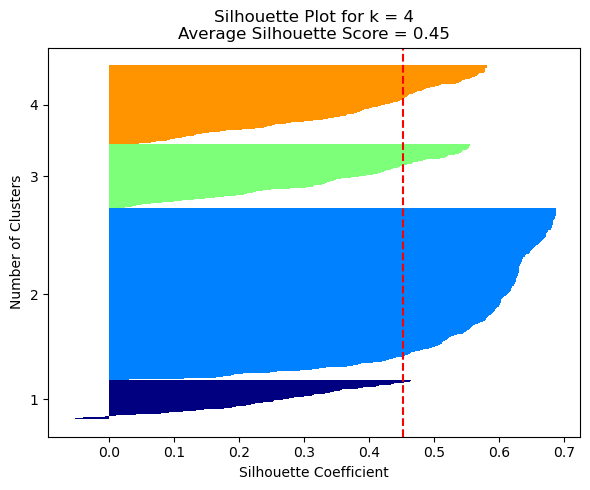

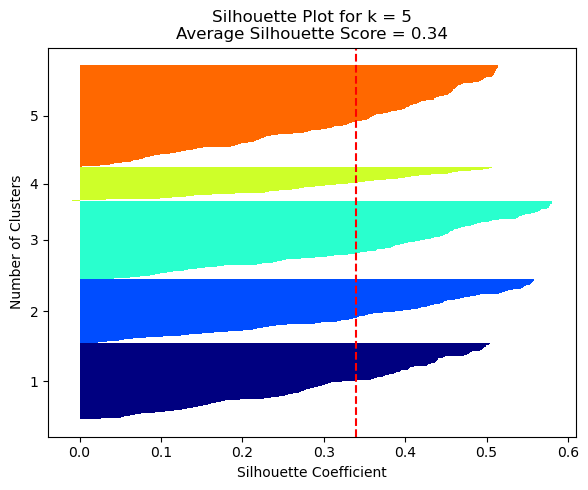

In [322]:
# Set your input data (standardized version)
X = df2.drop(columns=['kmeans_cluster', 'agg_cluster'], errors='ignore')

# Function to plot silhouette plot for a given k
def plot_silhouette_k(k, X):
    km2 = KMeans(n_clusters=k,  
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)

    y_km = km2.fit_predict(X)
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]

    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    silhouette_avg = np.mean(silhouette_vals)

    # Plotting silhouette values 
    y_ax_lower, yticks = 0, []
    plt.figure(figsize=(6, 5))

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper = y_ax_lower + len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                 c_silhouette_vals,
                 height=1.0,
                 edgecolor='none',
                 color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower = y_ax_upper

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Number of Clusters')
    plt.xlabel('Silhouette Coefficient')
    plt.title(f'Silhouette Plot for k = {k}\nAverage Silhouette Score = {silhouette_avg:.2f}')
    plt.tight_layout()
    plt.show()

# Generate silhouette plots for k = 3, 4, and 5
for k in [3, 4, 5]:
    plot_silhouette_k(k, X)


In [329]:
# K-means++ Clustering (k=4)
k = 4
clustering_X = df2.copy()

km_plus = KMeans(
    n_clusters=k, 
    init='k-means++',  
    n_init=10,
    max_iter=300,
    random_state=0
)

# Step 4: Fit the model and assign cluster labels to each customer
y_km_plus = km_plus.fit_predict(clustering_X)
clustering_X['kmeans_cluster'] = y_km_plus

# Step 5: Get the cluster center values (still in standardized form)
kmeans_centers_scaled = pd.DataFrame(
    km_plus.cluster_centers_, 
    columns=clustering_X.columns[:-1]
    )

# Inverse transform numeric columns for interpretability
numeric_centers_original = pd.DataFrame(
    scaler.inverse_transform(kmeans_centers_scaled[['Age', 'Income']]),
    columns=['Age', 'Income']
)

# Step 6: Convert the scaled Age and Income back to original values
original_val = scaler.inverse_transform(numeric_centers_original[['Age', 'Income']])
original_centers = pd.DataFrame(original_val, columns=['Age', 'Income'])

# Attach categorical mode values
categorical_cols = ['Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']
cluster_modes = clustering_X.groupby('kmeans_cluster')[categorical_cols].agg(lambda x: x.mode()[0])

# Combine interpretable summary
cluster_summary = pd.concat([cluster_modes, numeric_centers_original], axis=1)
print("K-means++ Clustering Summary:")
print(cluster_summary.round(3).to_string())

# Show number of customers per cluster
print("\nNumber of customers per K-means++ cluster:")
print(clustering_X['kmeans_cluster'].value_counts().sort_index())

K-means++ Clustering Summary:
   Gender  Marital Status  Education  Occupation  Settlement Size     Age      Income
0       1               1          2           1                0  47.434  169856.208
1       0               0          1           0                0  33.391  101199.152
2       1               1          2           1                2  54.309  203412.678
3       1               1          2           1                2  42.738  146843.480

Number of customers per K-means++ cluster:
kmeans_cluster
0    221
1    970
2    363
3    446
Name: count, dtype: int64


In [328]:
# Agglomerative Clustering (k=4)
ac = AgglomerativeClustering(
    n_clusters=4, 
    metric='euclidean', 
    linkage='complete')

X_ac = df2.copy()
X_ac['ac_cluster'] = ac.fit_predict(X_ac)

original_val = scaler.inverse_transform(X_ac[['Age', 'Income']])
original_centers = pd.DataFrame(original_val, columns=['Age', 'Income'])


X_ac[['Age', 'Income']] = original_centers

# Step 5: Get cluster-level summaries
categorical_modes = X_ac.groupby('ac_cluster')[categorical_cols].agg(lambda x: x.mode()[0])
numerical_means = X_ac.groupby('ac_cluster')[numerical_cols].mean().round(3)

# Step 6: Combine summaries
agg_cluster_summary = pd.concat([categorical_modes, numerical_means], axis=1)

# Display results
print("Agglomerative Clustering Summary:")
print(agg_cluster_summary.to_string())

print("\nNumber of customers per Agglomerative cluster:")
print(X_ac['ac_cluster'].value_counts().sort_index())


Agglomerative Clustering Summary:
            Gender  Marital Status  Education  Occupation  Settlement Size     Age      Income
ac_cluster                                                                                    
0                1               1          2           1                2  40.944  138145.075
1                1               1          2           1                2  50.497  184742.667
2                1               1          2           1                2  62.462  243217.096
3                0               0          1           0                0  32.129   95041.151

Number of customers per Agglomerative cluster:
ac_cluster
0    481
1    630
2     52
3    837
Name: count, dtype: int64
